In [1]:
# Initial imports
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
%matplotlib inline

In [2]:
# Loading data
df = pd.read_csv("Resources/final_panel_data.csv")
pd.set_option('display.max_columns', None)
df.head()

,year,gender,region,relation_to_head_of_house,age,years_of_education,annual_hours,annual_income,white,black,hisp,other_race,degree,09_updated_degree,updated_years_of_education,annual_weeks_worked,union_job,usual_hours_per_week,labor_income_from_business,years_experience,full_time_experience,part_time_experience,government_worker,hourly_wage,wage_inflation_factor,adj_hourly_wage,real_hourly_wage,full_time_job,potential_experience,high_school_or_less,bachelors_degree,advanced_degree,occupation_category,agriculture,mining_construction,durables,nondurables,transport,transport.1,utilities,communications,retail_trade,wholesale_trade,finance,social_art_other,hospitality,medical,education,professional,public_admin,manager,business,financial_operations,computer,architect,scientist,socialworker,professor,legal,artist,physicians,healthcare,healthsupport,protective,foodcare,building,sales,office_admin,farmer,construction,production,transport.2,transport.3
0,1981,1,1.0,10,34,16.0,1600,10000.0,1,0,0,0,1.0,1.0,17,32.0,0,50.0,0,12.0,12.0,0.0,0.0,6.0,2.31,14.0,3.0,1,12.0,0,1,0,Other,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,1981,1,2.0,10,32,14.0,520,9095.0,0,1,0,0,0.0,0.0,14,13.0,1,40.0,0,14.0,11.0,3.0,0.0,17.0,2.31,40.0,4.0,1,12.0,1,0,0,Production,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,2009,1,1.0,10,64,12.0,2550,45200.0,0,1,0,0,0.0,0.0,12,51.0,0,50.0,0,39.0,38.0,1.0,0.0,18.0,1.02,18.0,3.0,1,46.0,1,0,0,Production,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,1999,1,2.0,10,50,12.0,3072,25000.0,1,0,0,0,0.0,0.0,12,51.0,0,60.0,0,30.0,30.0,0.0,0.0,8.0,1.27,10.0,2.0,1,32.0,1,0,0,Transportation and Materials Moving,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,1990,1,3.0,10,26,12.0,2100,24500.0,1,0,0,0,0.0,0.0,12,50.0,0,42.0,0,8.0,8.0,0.0,0.0,12.0,1.57,18.0,3.0,1,8.0,1,0,0,Production,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [3]:
# Value count column
df['full_time_job'].value_counts()

1    29019
0     4379
Name: full_time_job, dtype: int64

In [4]:
# Display all columns
my_list = list(df)
print (my_list)

['year', 'gender', 'region', 'relation_to_head_of_house', 'age', 'years_of_education', 'annual_hours', 'annual_income', 'white', 'black', 'hisp', 'other_race', 'degree', '09_updated_degree', 'updated_years_of_education', 'annual_weeks_worked', 'union_job', 'usual_hours_per_week', 'labor_income_from_business', 'years_experience', 'full_time_experience', 'part_time_experience', 'government_worker', 'hourly_wage', 'wage_inflation_factor', 'adj_hourly_wage', 'real_hourly_wage', 'full_time_job', 'potential_experience', 'high_school_or_less', 'bachelors_degree', 'advanced_degree', 'occupation_category', 'agriculture', 'mining_construction', 'durables', 'nondurables', 'transport', 'transport.1', 'utilities', 'communications', 'retail_trade', 'wholesale_trade', 'finance', 'social_art_other', 'hospitality', 'medical', 'education', 'professional', 'public_admin', 'manager', 'business', 'financial_operations', 'computer', 'architect', 'scientist', 'socialworker', 'professor', 'legal', 'artist', '

In [5]:
# Drop the non-beneficial columns.
dropped_df = df.drop(['degree', '09_updated_degree', 'annual_hours', 'adj_hourly_wage', 'annual_weeks_worked', 'usual_hours_per_week', 'updated_years_of_education', 'occupation_category', 'labor_income_from_business', 'years_experience', 'hourly_wage', 'wage_inflation_factor', 'real_hourly_wage', 'potential_experience', 'agriculture', 'mining_construction', 'durables', 'nondurables', 'transport', 'transport.1', 'utilities', 'communications', 'retail_trade', 'wholesale_trade', 'finance', 'social_art_other', 'hospitality', 'medical', 'education', 'professional', 'public_admin', 'manager', 'business', 'financial_operations', 'computer', 'architect', 'scientist', 'socialworker', 'professor', 'legal', 'artist', 'physicians', 'healthcare', 'healthsupport', 'protective', 'foodcare', 'building', 'sales', 'office_admin', 'farmer', 'construction', 'production', 'transport.2', 'transport.3'], axis=1)
dropped_df

,year,gender,region,relation_to_head_of_house,age,years_of_education,annual_income,white,black,hisp,other_race,union_job,full_time_experience,part_time_experience,government_worker,full_time_job,high_school_or_less,bachelors_degree,advanced_degree
0,1981,1,1.0,10,34,16.0,10000.0,1,0,0,0,0,12.0,0.0,0.0,1,0,1,0
1,1981,1,2.0,10,32,14.0,9095.0,0,1,0,0,1,11.0,3.0,0.0,1,1,0,0
2,2009,1,1.0,10,64,12.0,45200.0,0,1,0,0,0,38.0,1.0,0.0,1,1,0,0
3,1999,1,2.0,10,50,12.0,25000.0,1,0,0,0,0,30.0,0.0,0.0,1,1,0,0
4,1990,1,3.0,10,26,12.0,24500.0,1,0,0,0,0,8.0,0.0,0.0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33393,1990,2,1.0,20,34,16.0,37000.0,1,0,0,0,0,13.0,3.0,0.0,1,0,1,0
33394,1981,2,2.0,20,54,12.0,22198.0,1,0,0,0,0,35.0,0.0,0.0,1,1,0,0
33395,1981,2,3.0,20,33,10.0,7488.0,0,1,0,0,0,3.0,0.0,0.0,1,1,0,0
33396,1999,2,3.0,10,25,11.0,18000.0,0,1,0,0,0,5.0,1.0,0.0,1,1,0,0


In [6]:
# Drop the null-value columns.
model_df = dropped_df.drop(['region', 'years_of_education', 'government_worker', 'annual_income'], axis=1)
pd.set_option('display.max_columns', None)
model_df.head()

,year,gender,relation_to_head_of_house,age,white,black,hisp,other_race,union_job,full_time_experience,part_time_experience,full_time_job,high_school_or_less,bachelors_degree,advanced_degree
0,1981,1,10,34,1,0,0,0,0,12.0,0.0,1,0,1,0
1,1981,1,10,32,0,1,0,0,1,11.0,3.0,1,1,0,0
2,2009,1,10,64,0,1,0,0,0,38.0,1.0,1,1,0,0
3,1999,1,10,50,1,0,0,0,0,30.0,0.0,1,1,0,0
4,1990,1,10,26,1,0,0,0,0,8.0,0.0,1,1,0,0


In [7]:
# Check for year values
model_df['year'].unique()

array([1981, 2009, 1999, 1990, 2011, 2007], dtype=int64)

In [8]:
# Make a dataframe with only male candidates
male_df = model_df[model_df['gender']== 1]
male_df

,year,gender,relation_to_head_of_house,age,white,black,hisp,other_race,union_job,full_time_experience,part_time_experience,full_time_job,high_school_or_less,bachelors_degree,advanced_degree
0,1981,1,10,34,1,0,0,0,0,12.0,0.0,1,0,1,0
1,1981,1,10,32,0,1,0,0,1,11.0,3.0,1,1,0,0
2,2009,1,10,64,0,1,0,0,0,38.0,1.0,1,1,0,0
3,1999,1,10,50,1,0,0,0,0,30.0,0.0,1,1,0,0
4,1990,1,10,26,1,0,0,0,0,8.0,0.0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16231,2009,1,10,31,1,0,0,0,1,12.0,0.0,1,1,0,0
16232,2007,1,10,36,0,1,0,0,0,16.0,0.0,1,0,0,1
16233,2007,1,10,47,0,1,0,0,1,22.0,1.0,1,1,0,0
16234,1990,1,10,56,1,0,0,0,0,33.0,3.0,1,1,0,0


In [9]:
# Make a dataframe with only 1981 male candidates
male81_df = male_df[male_df['year']== 1981]

# Make a dataframe with only 1981 male candidates
male90_df = male_df[male_df['year']== 1990]

# Make a dataframe with only 1981 male candidates
male99_df = male_df[male_df['year']== 1999]

# Make a dataframe with only 1981 male candidates
male07_df = male_df[male_df['year']== 2007]

# Make a dataframe with only 1981 male candidates
male11_df = male_df[male_df['year']== 2011]
male11_df

,year,gender,relation_to_head_of_house,age,white,black,hisp,other_race,union_job,full_time_experience,part_time_experience,full_time_job,high_school_or_less,bachelors_degree,advanced_degree
5,2011,1,10,39,1,0,0,0,0,6.000000,9.000000,1,0,0,1
16,2011,1,10,36,1,0,0,0,1,8.896952,2.103048,1,1,0,0
22,2011,1,10,26,0,1,0,0,0,2.000000,5.000000,1,1,0,0
24,2011,1,10,55,1,0,0,0,0,37.000000,0.000000,1,1,0,0
26,2011,1,10,49,0,0,1,0,1,18.000000,6.000000,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16210,2011,1,10,40,0,1,0,0,0,17.000000,1.000000,1,1,0,0
16213,2011,1,10,44,0,1,0,0,0,23.000000,1.000000,1,1,0,0
16215,2011,1,10,49,1,0,0,0,0,18.000000,6.000000,1,0,0,1
16217,2011,1,10,28,0,0,0,1,0,8.000000,0.000000,1,1,0,0


In [10]:
# Make a dataframe with only male candidates
female_df = model_df[model_df['gender']== 2]
female_df

,year,gender,relation_to_head_of_house,age,white,black,hisp,other_race,union_job,full_time_experience,part_time_experience,full_time_job,high_school_or_less,bachelors_degree,advanced_degree
16236,1981,2,20,35,1,0,0,0,0,8.0,0.0,1,1,0,0
16237,2007,2,10,26,1,0,0,0,0,2.0,2.0,1,1,0,0
16238,2009,2,20,59,1,0,0,0,0,18.0,13.0,1,0,0,1
16239,2007,2,10,45,0,1,0,0,0,22.0,0.0,1,1,0,0
16240,1999,2,20,30,1,0,0,0,0,10.0,0.0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33393,1990,2,20,34,1,0,0,0,0,13.0,3.0,1,0,1,0
33394,1981,2,20,54,1,0,0,0,0,35.0,0.0,1,1,0,0
33395,1981,2,20,33,0,1,0,0,0,3.0,0.0,1,1,0,0
33396,1999,2,10,25,0,1,0,0,0,5.0,1.0,1,1,0,0


In [11]:
# Make a dataframe with only 1981 female candidates
female81_df = female_df[female_df['year']== 1981]

# Make a dataframe with only 1981 female candidates
female90_df = female_df[female_df['year']== 1990]

# Make a dataframe with only 1981 female candidates
female99_df = female_df[female_df['year']== 1999]

# Make a dataframe with only 1981 female candidates
female07_df = female_df[female_df['year']== 2007]

# Make a dataframe with only 1981 female candidates
female11_df = female_df[female_df['year']== 2011]
female11_df

,year,gender,relation_to_head_of_house,age,white,black,hisp,other_race,union_job,full_time_experience,part_time_experience,full_time_job,high_school_or_less,bachelors_degree,advanced_degree
16243,2011,2,20,37,0,0,1,0,0,12.0,0.0,0,1,0,0
16253,2011,2,20,49,1,0,0,0,0,27.0,0.0,1,0,1,0
16258,2011,2,22,31,1,0,0,0,0,13.0,0.0,0,1,0,0
16261,2011,2,10,43,1,0,0,0,0,20.0,0.0,0,1,0,0
16262,2011,2,10,50,1,0,0,0,0,2.0,17.0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33369,2011,2,10,37,1,0,0,0,0,19.0,0.0,1,1,0,0
33372,2011,2,22,28,1,0,0,0,0,10.0,0.0,1,0,1,0
33373,2011,2,20,30,1,0,0,0,1,3.0,0.0,1,1,0,0
33383,2011,2,20,46,1,0,0,0,1,19.0,2.0,1,1,0,0


In [12]:
# Define features set **
X = male81_df.copy()
X.drop("full_time_job", axis=1, inplace=True)

# Define target vector **
y = male81_df["full_time_job"].ravel()
y[:5]

# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

# Creating StandardScaler instance
scaler = StandardScaler()

# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)

# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)

# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_
# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)


Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,4,24
Actual 1,3,605


Accuracy Score : 0.9575471698113207
Classification Report
              precision    recall  f1-score   support

           0       0.57      0.14      0.23        28
           1       0.96      1.00      0.98       608

    accuracy                           0.96       636
   macro avg       0.77      0.57      0.60       636
weighted avg       0.94      0.96      0.95       636



[(0.35064195896616296, 'full_time_experience'),
 (0.3140725154852312, 'age'),
 (0.20790407503717903, 'part_time_experience'),
 (0.04116394078185674, 'union_job'),
 (0.018415112631927008, 'black'),
 (0.016921035247844884, 'white'),
 (0.01578075525063597, 'high_school_or_less'),
 (0.012730645502275055, 'advanced_degree'),
 (0.010639966185769078, 'bachelors_degree'),
 (0.007513699387794692, 'hisp'),
 (0.004216295523323291, 'other_race'),
 (0.0, 'year'),
 (0.0, 'relation_to_head_of_house'),
 (0.0, 'gender')]

<AxesSubplot:title={'center':'Feature Importance - Male 1981'}, ylabel='1'>

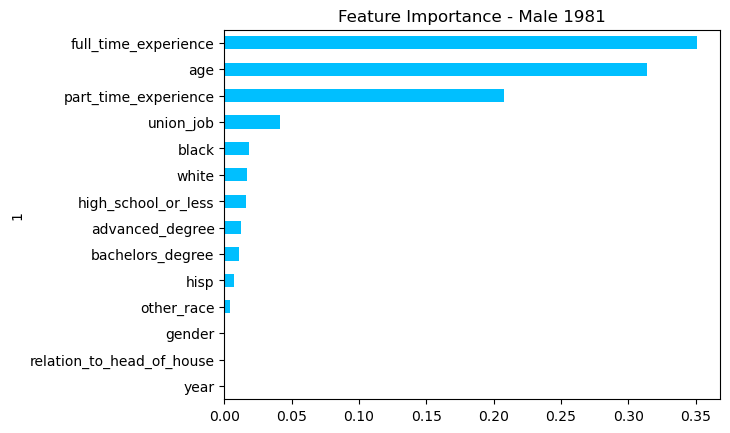

In [13]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='deepskyblue', title= 'Feature Importance - Male 1981', legend=False)

In [14]:
# Define features set **
X = male90_df.copy()
X.drop("full_time_job", axis=1, inplace=True)

# Define target vector **
y = male90_df["full_time_job"].ravel()
y[:5]

# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

# Creating StandardScaler instance
scaler = StandardScaler()

# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)

# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)

# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_
# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)


Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,2,33
Actual 1,7,671


Accuracy Score : 0.9438990182328191
Classification Report
              precision    recall  f1-score   support

           0       0.22      0.06      0.09        35
           1       0.95      0.99      0.97       678

    accuracy                           0.94       713
   macro avg       0.59      0.52      0.53       713
weighted avg       0.92      0.94      0.93       713



[(0.3334608673194874, 'full_time_experience'),
 (0.32852064229380307, 'age'),
 (0.21064930452166042, 'part_time_experience'),
 (0.04135618489146064, 'union_job'),
 (0.016474122237110807, 'high_school_or_less'),
 (0.016435146151982206, 'black'),
 (0.015488318717738125, 'white'),
 (0.012167199971488208, 'bachelors_degree'),
 (0.011082711592960147, 'advanced_degree'),
 (0.011080966348817778, 'hisp'),
 (0.0032845359534913175, 'other_race'),
 (0.0, 'year'),
 (0.0, 'relation_to_head_of_house'),
 (0.0, 'gender')]

<AxesSubplot:title={'center':'Feature Importance- Male 1990'}, ylabel='1'>

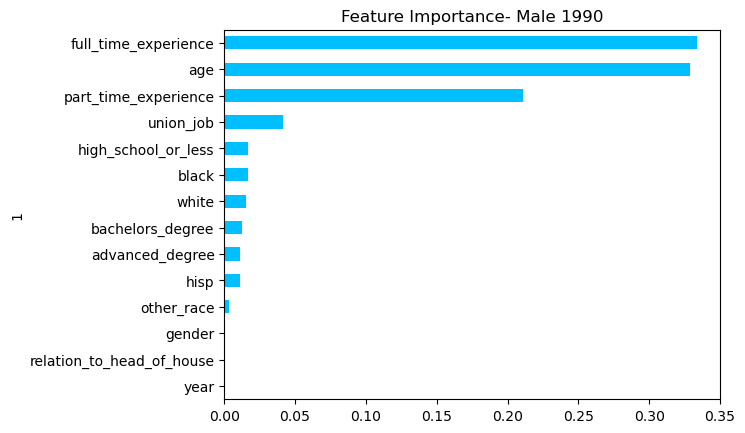

In [15]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='deepskyblue', title= 'Feature Importance- Male 1990', legend=False)

In [16]:
# Define features set **
X = male99_df.copy()
X.drop("full_time_job", axis=1, inplace=True)

# Define target vector **
y = male99_df["full_time_job"].ravel()
y[:5]

# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

# Creating StandardScaler instance
scaler = StandardScaler()

# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)

# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)

# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_
# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)


Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,1,27
Actual 1,3,629


Accuracy Score : 0.9545454545454546
Classification Report
              precision    recall  f1-score   support

           0       0.25      0.04      0.06        28
           1       0.96      1.00      0.98       632

    accuracy                           0.95       660
   macro avg       0.60      0.52      0.52       660
weighted avg       0.93      0.95      0.94       660



[(0.3327007838082417, 'full_time_experience'),
 (0.297178061886151, 'age'),
 (0.25003585780189, 'part_time_experience'),
 (0.034838117723071854, 'union_job'),
 (0.018492176926073266, 'high_school_or_less'),
 (0.01784282276640835, 'bachelors_degree'),
 (0.01616777390803858, 'white'),
 (0.014686220043276198, 'black'),
 (0.012091890826200186, 'advanced_degree'),
 (0.005204946653403396, 'other_race'),
 (0.0007613476572454876, 'hisp'),
 (0.0, 'year'),
 (0.0, 'relation_to_head_of_house'),
 (0.0, 'gender')]

<AxesSubplot:title={'center':'Feature Importance- Male 1999'}, ylabel='1'>

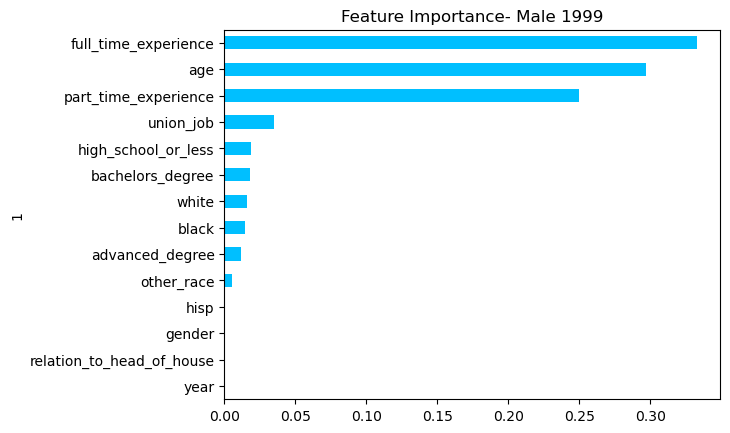

In [17]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='deepskyblue', title= 'Feature Importance- Male 1999', legend=False)

In [18]:
# Define features set **
X = male07_df.copy()
X.drop("full_time_job", axis=1, inplace=True)

# Define target vector **
y = male07_df["full_time_job"].ravel()
y[:5]

# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

# Creating StandardScaler instance
scaler = StandardScaler()

# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)

# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)

# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_
# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)


Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,2,31
Actual 1,11,656


Accuracy Score : 0.94
Classification Report
              precision    recall  f1-score   support

           0       0.15      0.06      0.09        33
           1       0.95      0.98      0.97       667

    accuracy                           0.94       700
   macro avg       0.55      0.52      0.53       700
weighted avg       0.92      0.94      0.93       700



[(0.35467066636727773, 'full_time_experience'),
 (0.29874286402289973, 'age'),
 (0.24472821946063836, 'part_time_experience'),
 (0.027831054170573247, 'union_job'),
 (0.016775167461248037, 'high_school_or_less'),
 (0.014442879522756708, 'bachelors_degree'),
 (0.012994690257590641, 'white'),
 (0.012309739291162946, 'black'),
 (0.010455992075516724, 'advanced_degree'),
 (0.005721541155160763, 'hisp'),
 (0.0013271862151751823, 'other_race'),
 (0.0, 'year'),
 (0.0, 'relation_to_head_of_house'),
 (0.0, 'gender')]

<AxesSubplot:title={'center':'Feature Importance- Male 2007'}, ylabel='1'>

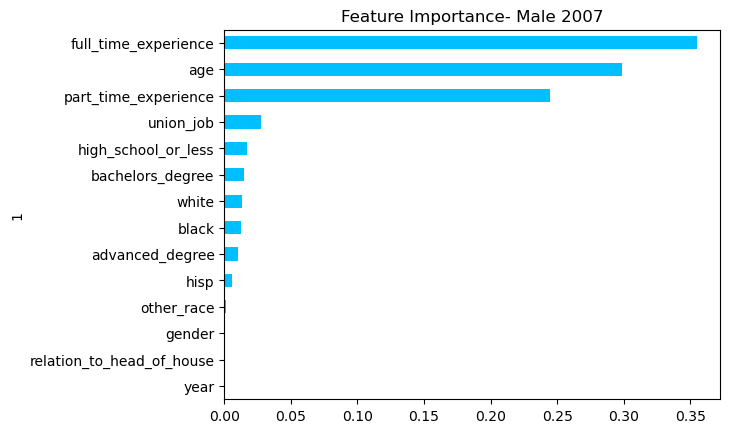

In [19]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='deepskyblue', title= 'Feature Importance- Male 2007', legend=False)

In [20]:
# Define features set **
X = male11_df.copy()
X.drop("full_time_job", axis=1, inplace=True)

# Define target vector **
y = male11_df["full_time_job"].ravel()
y[:5]

# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

# Creating StandardScaler instance
scaler = StandardScaler()

# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)

# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)

# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_
# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)


Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,3,37
Actual 1,9,613


Accuracy Score : 0.9305135951661632
Classification Report
              precision    recall  f1-score   support

           0       0.25      0.07      0.12        40
           1       0.94      0.99      0.96       622

    accuracy                           0.93       662
   macro avg       0.60      0.53      0.54       662
weighted avg       0.90      0.93      0.91       662



[(0.347679835357855, 'full_time_experience'),
 (0.33595106020830656, 'age'),
 (0.2182287075487185, 'part_time_experience'),
 (0.02579396598469626, 'union_job'),
 (0.01607785467463717, 'high_school_or_less'),
 (0.013943443411111658, 'bachelors_degree'),
 (0.011967388058729479, 'white'),
 (0.011691192728252408, 'black'),
 (0.009020834991728007, 'advanced_degree'),
 (0.006107716974764414, 'hisp'),
 (0.0035380000612005454, 'other_race'),
 (0.0, 'year'),
 (0.0, 'relation_to_head_of_house'),
 (0.0, 'gender')]

<AxesSubplot:title={'center':'Feature Importance- Male 2011'}, ylabel='1'>

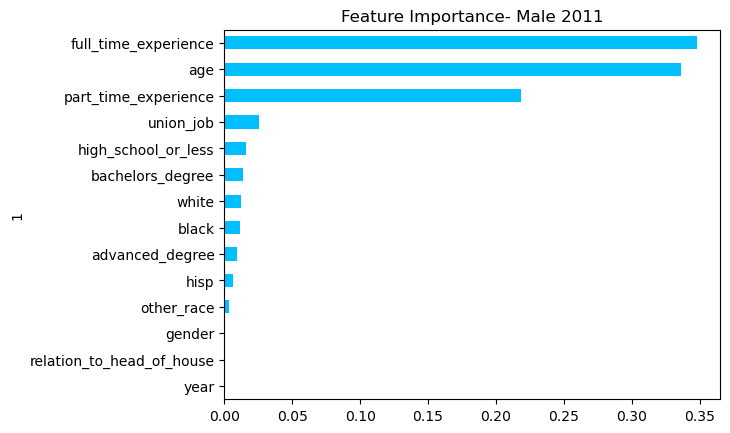

In [21]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='deepskyblue', title= 'Feature Importance- Male 2011', legend=False)

In [22]:
# Define features set **
X = female81_df.copy()
X.drop("full_time_job", axis=1, inplace=True)

# Define target vector **
y = female81_df["full_time_job"].ravel()
y[:5]

# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

# Creating StandardScaler instance
scaler = StandardScaler()

# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)

# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)

# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_
# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)


Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,50,79
Actual 1,40,349


Accuracy Score : 0.7702702702702703
Classification Report
              precision    recall  f1-score   support

           0       0.56      0.39      0.46       129
           1       0.82      0.90      0.85       389

    accuracy                           0.77       518
   macro avg       0.69      0.64      0.66       518
weighted avg       0.75      0.77      0.76       518



[(0.30868566622740234, 'full_time_experience'),
 (0.2880422469375971, 'age'),
 (0.27471210093708914, 'part_time_experience'),
 (0.03336510463982475, 'relation_to_head_of_house'),
 (0.027065904131374774, 'union_job'),
 (0.014663895935257881, 'white'),
 (0.013901341465697156, 'black'),
 (0.013263865913937599, 'high_school_or_less'),
 (0.010163377653427208, 'bachelors_degree'),
 (0.008745870435644735, 'advanced_degree'),
 (0.005863795099817743, 'hisp'),
 (0.0015268306229295973, 'other_race'),
 (0.0, 'year'),
 (0.0, 'gender')]

Text(0, 0.5, 'Features')

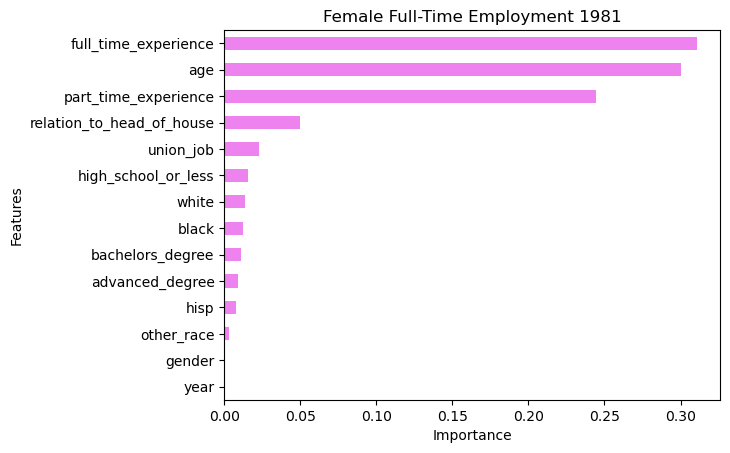

In [32]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='violet', title= 'Female Full-Time Employment 1981', legend=False)
plt.xlabel('Importance')
plt.ylabel('Features')

In [24]:
# Define features set **
X = female90_df.copy()
X.drop("full_time_job", axis=1, inplace=True)

# Define target vector **
y = female90_df["full_time_job"].ravel()
y[:5]

# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

# Creating StandardScaler instance
scaler = StandardScaler()

# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)

# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)

# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_
# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)


Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,77,81
Actual 1,57,482


Accuracy Score : 0.8020086083213773
Classification Report
              precision    recall  f1-score   support

           0       0.57      0.49      0.53       158
           1       0.86      0.89      0.87       539

    accuracy                           0.80       697
   macro avg       0.72      0.69      0.70       697
weighted avg       0.79      0.80      0.80       697



[(0.31411880059947167, 'full_time_experience'),
 (0.27526603111904857, 'part_time_experience'),
 (0.27467439883780587, 'age'),
 (0.04261927959660256, 'relation_to_head_of_house'),
 (0.026870452342016963, 'union_job'),
 (0.014772166846394893, 'white'),
 (0.013070693110151568, 'high_school_or_less'),
 (0.011981447142710419, 'black'),
 (0.011568949290291336, 'bachelors_degree'),
 (0.00811478195802811, 'advanced_degree'),
 (0.00421192489050496, 'hisp'),
 (0.00273107426697333, 'other_race'),
 (0.0, 'year'),
 (0.0, 'gender')]

Text(0, 0.5, 'Features')

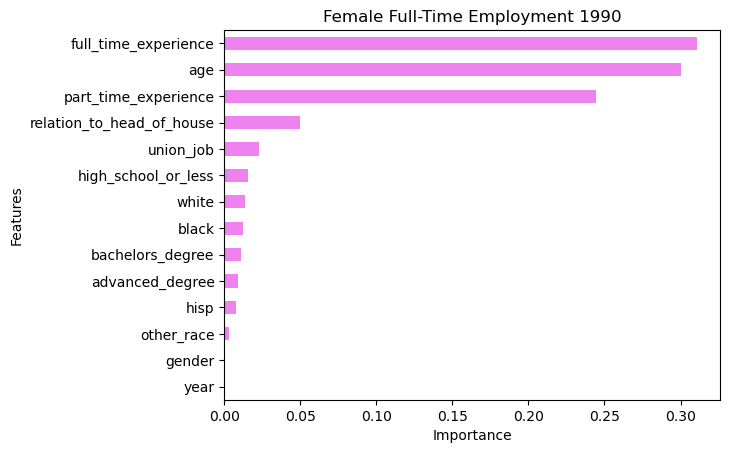

In [33]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='violet', title= 'Female Full-Time Employment 1990', legend=False)
plt.xlabel('Importance')
plt.ylabel('Features')

In [26]:
# Define features set **
X = female99_df.copy()
X.drop("full_time_job", axis=1, inplace=True)

# Define target vector **
y = female99_df["full_time_job"].ravel()
y[:5]

# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

# Creating StandardScaler instance
scaler = StandardScaler()

# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)

# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)

# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_
# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)


Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,37,103
Actual 1,38,518


Accuracy Score : 0.7974137931034483
Classification Report
              precision    recall  f1-score   support

           0       0.49      0.26      0.34       140
           1       0.83      0.93      0.88       556

    accuracy                           0.80       696
   macro avg       0.66      0.60      0.61       696
weighted avg       0.77      0.80      0.77       696



[(0.30543850283352486, 'age'),
 (0.291866709702255, 'full_time_experience'),
 (0.262050383075908, 'part_time_experience'),
 (0.04427805551651112, 'relation_to_head_of_house'),
 (0.027768154339397163, 'union_job'),
 (0.014817381714702977, 'white'),
 (0.013752426028683616, 'high_school_or_less'),
 (0.012290047144423713, 'black'),
 (0.010960386287229089, 'bachelors_degree'),
 (0.009830558209532955, 'advanced_degree'),
 (0.0037248062328469446, 'hisp'),
 (0.0032225889149845007, 'other_race'),
 (0.0, 'year'),
 (0.0, 'gender')]

Text(0, 0.5, 'Features')

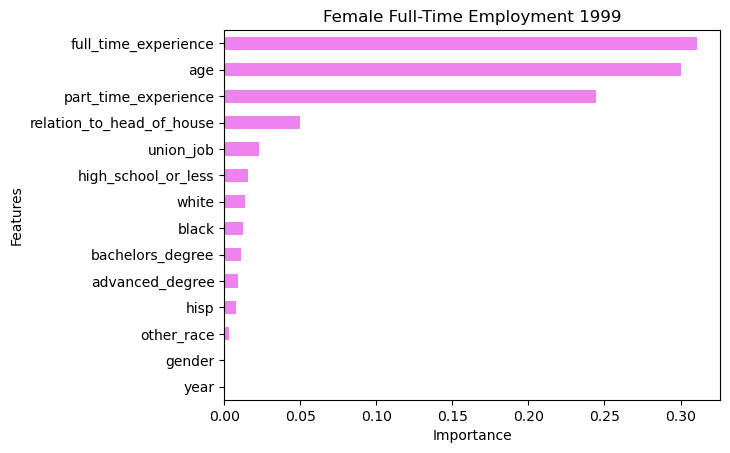

In [34]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='violet', title= 'Female Full-Time Employment 1999', legend=False)
plt.xlabel('Importance')
plt.ylabel('Features')

In [28]:
# Define features set **
X = female07_df.copy()
X.drop("full_time_job", axis=1, inplace=True)

# Define target vector **
y = female07_df["full_time_job"].ravel()
y[:5]

# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

# Creating StandardScaler instance
scaler = StandardScaler()

# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)

# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)

# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_
# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)


Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,29,112
Actual 1,37,613


Accuracy Score : 0.8116308470290771
Classification Report
              precision    recall  f1-score   support

           0       0.44      0.21      0.28       141
           1       0.85      0.94      0.89       650

    accuracy                           0.81       791
   macro avg       0.64      0.57      0.59       791
weighted avg       0.77      0.81      0.78       791



[(0.32017008168075606, 'full_time_experience'),
 (0.2933260175446672, 'age'),
 (0.24806360033512634, 'part_time_experience'),
 (0.04314092881378179, 'relation_to_head_of_house'),
 (0.024719987063506442, 'union_job'),
 (0.015631764555436047, 'high_school_or_less'),
 (0.013484014648534336, 'white'),
 (0.01269998606317962, 'bachelors_degree'),
 (0.011842956844287168, 'black'),
 (0.009866166046626294, 'advanced_degree'),
 (0.004420459495583319, 'hisp'),
 (0.002634036908515529, 'other_race'),
 (0.0, 'year'),
 (0.0, 'gender')]

Text(0, 0.5, 'Features')

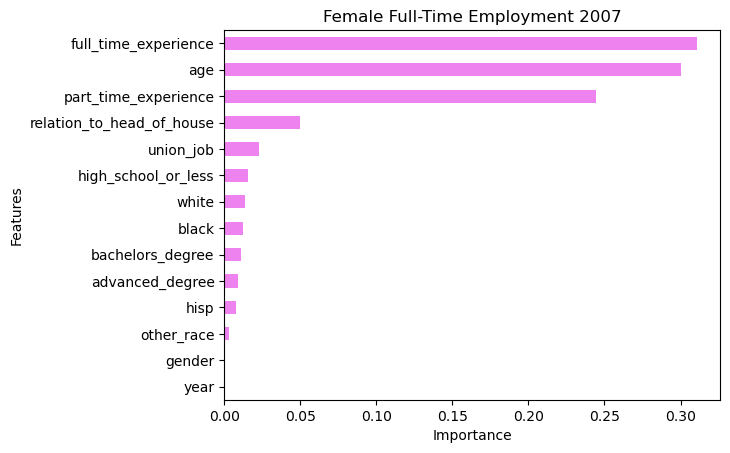

In [35]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='violet', title= 'Female Full-Time Employment 2007', legend=False)
plt.xlabel('Importance')
plt.ylabel('Features')

In [30]:
# Define features set **
X = female11_df.copy()
X.drop("full_time_job", axis=1, inplace=True)

# Define target vector **
y = female11_df["full_time_job"].ravel()
y[:5]

# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

# Creating StandardScaler instance
scaler = StandardScaler()

# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)

# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)

# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_
# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)


Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,37,126
Actual 1,42,582


Accuracy Score : 0.7865311308767471
Classification Report
              precision    recall  f1-score   support

           0       0.47      0.23      0.31       163
           1       0.82      0.93      0.87       624

    accuracy                           0.79       787
   macro avg       0.65      0.58      0.59       787
weighted avg       0.75      0.79      0.76       787



[(0.31060565808598356, 'full_time_experience'),
 (0.300422524929178, 'age'),
 (0.24441179574370098, 'part_time_experience'),
 (0.049742530858067624, 'relation_to_head_of_house'),
 (0.02261338514837888, 'union_job'),
 (0.015492942028526493, 'high_school_or_less'),
 (0.013574863239223437, 'white'),
 (0.012436249971565774, 'black'),
 (0.011151700910609094, 'bachelors_degree'),
 (0.009016619322191416, 'advanced_degree'),
 (0.00743847016807143, 'hisp'),
 (0.003093259594503252, 'other_race'),
 (0.0, 'year'),
 (0.0, 'gender')]

Text(0, 0.5, 'Features')

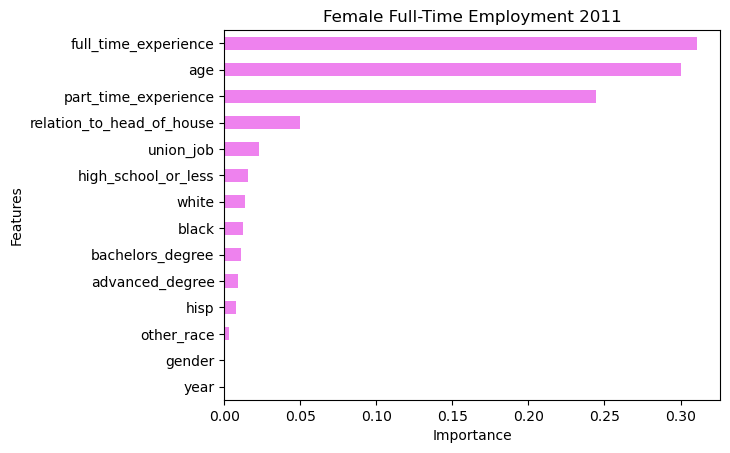

In [36]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='violet', title= 'Female Full-Time Employment 2011', legend=False)
plt.xlabel('Importance')
plt.ylabel('Features')